<a href="https://colab.research.google.com/github/chernandezrojas1991/exercises-u2-ml/blob/main/precios_de_casa_en_el_area_de_boston_en_1978.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [2]:
filename = "/content/drive/MyDrive/Coding Dojo/Machine Learning/Semana 2/Boston_Housing_from_Sklearn.csv"
df = pd.read_csv(filename)
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


# 1) Realicen un mapa de calor de las correlaciones. Identifiquen cualquier característica que tenga un coeficiente de correlación de magnitud 0,5 (puede ser + o -) o mayor con el precio. Limitaremos nuestros análisis a estas tres características.

Crear matriz de correlación

In [4]:
corr_matrix = df.corr()

Generar mapa de calor

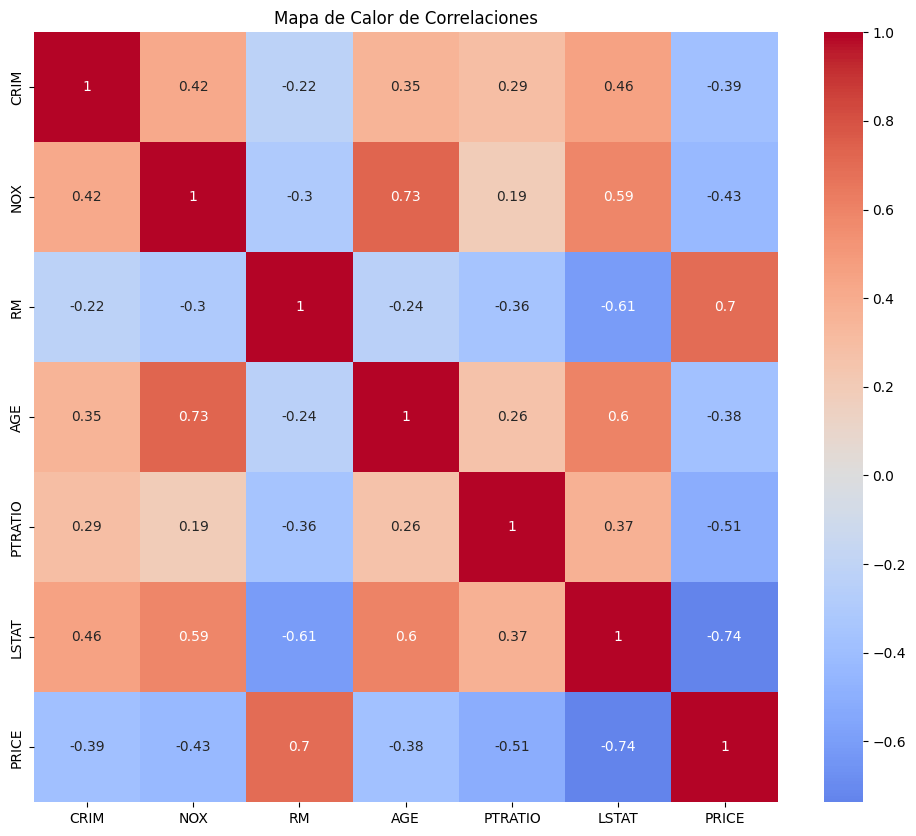

In [5]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

In [7]:
correlaciones_precio = corr_matrix['PRICE'].abs()
correlaciones_significativas = correlaciones_precio[correlaciones_precio >= 0.5]
print(correlaciones_significativas)

RM         0.695360
PTRATIO    0.507787
LSTAT      0.737663
PRICE      1.000000
Name: PRICE, dtype: float64


De acuerdo al mapa de calor (gráfico) y al cálculo de correlaciones respecto al precio (PRICE) cuya magnitud sea 0.5 o mayor, se determina que aquellas correlaciones más fuertes son para:

*   RM: número promedio de habitaciones por vivienda
*   PTRATIO: proporción de alumnos por profesor por ciudad
*   LSTAT: porcentaje de menor nivel económico de la población

Para una mejor interpretación de los datos y correlaciones, se concluye que el *número promedio de habitaciones por vivienda* (**RM**) es determinante en el precio de la vivienda, vale decir, mientras más grande y con mayores distribuciones tenga la vivienda, mayor precio tendrá ésta. Para la *proporción de alumnos por profesor por ciudad* (**PTRATIO**) también tiene una correlación fuerte respecto al precio, ya que a mayor cantidad de estudiantes, esto puede significar que las casas construídas son más grandes, por lo tanto, más caras al estar cerca de establecimientos educacionales. Por último, el *porcentaje de menor nivel económico de la población* (**LSTAT**) está relacionado a un bajo precio de las viviendas.



# 2) Seleccionen las columnas para la matriz de características (X) y seleccionen el PRECIO para el vector objetivo (y).

In [9]:
X = df.drop(columns = 'PRICE')
y = df['PRICE']

# 3) Dividan los datos en grupos de entrenamiento y de prueba. ¡Usen el número 42 como semilla aleatoria random_state!

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# 4) Instancien el modelo y ajústenlo al conjunto de entrenamiento.

In [21]:
reg = LinearRegression()

In [22]:
reg.fit(X_train,y_train)

LinearRegression()

# 5) Evaluar el rendimiento de su modelo en el conjunto de entrenamiento y de prueba usando la puntuación R^2.  ¿Existe alguna diferencia entre el modelo de rendimiento en los datos de entrenamiento vs. los datos de prueba?